In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

from plotly import colors

#### **Завдання 1**

Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [2]:
medical_df = pd.read_csv('./data/medical-charges.csv')
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


1. Correlation analysis: continuous variables
    - Perform correlation analysis for pairs of continuous variables `charges` vs `age`, `charges` vs `bmi`
    - Visualize the relationship using scatter plot
    - Identify any dependencies and consider creating data intervals for `charges` (for example, for clients aged 18-20 with a BMI 21-28, `charges` might range between 1000 and 1500). 
2. Correlation analysis: categorical vs continuous variables
    - Perform correlation analysis between categorical variables (`sex`, `children`, `smoker`, `region`) and the continuous target variable (`charges`)
    - Visualize these relationships using box plot
    - Identify any dependencies or pattern and consider creating data intervals for `charges` (for example, for non-smoking females with 2 children, `charges` might range between 2000 and 2800).
3. Use grouping and aggregation functions to derive additional numerical insights from the data.

#### **Завдання 2**

Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [3]:
fig = px.histogram(medical_df,
                   x='charges',
                   color='sex',
                   color_discrete_sequence=['chocolate', 'tan'],
                   marginal='box',
                   title='Distribution of Medical Charges by Sex')
fig.update_layout(bargap=0.1)
fig.show()

- There are a little of differences in the amount of medical charges for `female` and `male` clients
- For `female` clients, the IQR is smaller (Q3 = 14.4556K vs 19.00669K for `male`) and boundary for outliers is much lower (28.92314K for `female` vs 40.72055K for `male`)

In [4]:
fig = px.histogram(medical_df,
                   x='charges',
                   color='region',
                   color_discrete_sequence=colors.qualitative.Pastel,
                   marginal='box',
                   title='Distribution of Medical Charges by Region')
fig.update_layout(bargap=0.1)
fig.show()

There are noticeable differences in medical charges across regions:
- The highest charges are observed in the `southeast` region, while the lowest are in the `southwest` region
- The median values across regions fall within a small range, from 8.798K for `southwest` to 10.057K for `northeast`
- There are significant differences in the upper range of the IQR between regions

#### **Завдання 3**

Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [5]:
fig = px.scatter(medical_df,
                 x='charges',
                 y='region',
                 color='smoker',
                 opacity=0.7,
                 title='Region and Smoker vs Charges')
fig.show()

- The initial values for `charges` for smoker clients in any region start at around 15K
- A denser group of smoker clients is observed in the `southeast` region 
- The most frequent `charges` values for smoker clients fall within range of 34K to 50K

In [6]:
fig = px.scatter(medical_df,
                 x='charges',
                 y='children',
                 color='smoker',
                 opacity=0.8,
                 title='Children and Smoker vs Charges')
fig.show()

- Most smoker clients do not have any children
- Only one client with 5 children and three clients with 4 children are smokers
- As the number of children increases, the minimum `charges` value also increases
- The `charges` for clients with 4 or 5 children are lower than those for other clients

#### **Завдання 4**

Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [7]:
fig = px.violin(medical_df,
                y='charges',
                x='children',
                color_discrete_sequence=['tan'],
                title='Charges vs Children')
fig.show()

- As shown it the previous graph, the violin plot clearly illustrates that clients with 5 children have the smallest range of `charges`, from 4.6K to 19K
- The distribution of `charges` is very skewed to the right across all values of `children`
- For clients without children, the `charges` have bimodal right-skewed distribution with two peaks (about 2.3K and 11.4K)
- The most frequent `charges` values are below 20K

#### **Завдання 5**

Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [8]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [9]:
def estimate_charges(age, w, b):
    return w * age + b

In [10]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

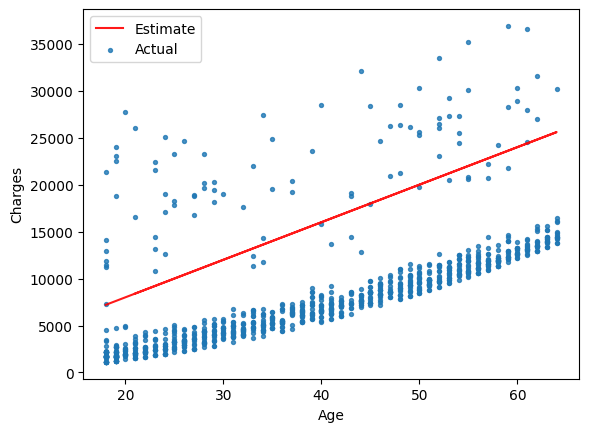

In [11]:
try_parameters(non_smoker_df, 400, 0)

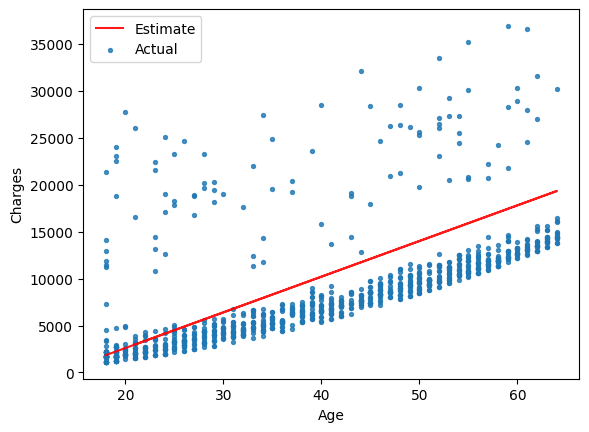

In [12]:
try_parameters(non_smoker_df, 380, -5000)

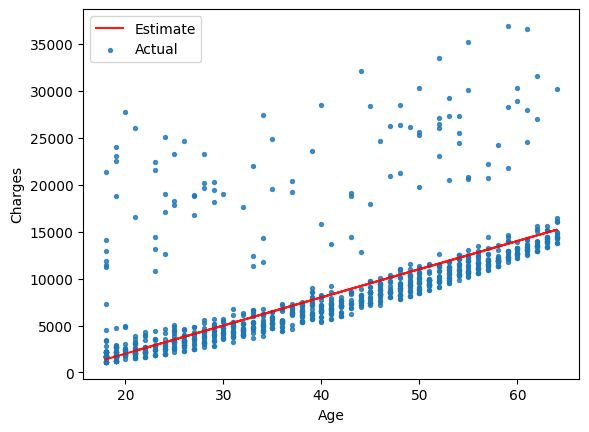

In [13]:
try_parameters(non_smoker_df, 300, -4000)

- The parameter `w` estimates the slope of the line. As the value of `w` decreases, the line becomes closer to horizontal. In our example, starting with an initial value of `w = 400` from the lecture, we need to decrease this value slightly
- The parameter `b` represents the intercept on the `charges` axis. We also need to reduce it from the initial lecture value of 5000
- For every 1-year increase in age, the value of `charges` increases by 300

#### **Завдання 6**

Напишіть функцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [14]:
def rmse(estimate_values, actual_values):
    return np.sqrt(np.mean(np.square(estimate_values - actual_values)))

In [15]:
def try_parameters_rmse(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    rmse_score= rmse(estimated_charges, target)
    print(f'RMSE: {rmse_score:.4f}')

In [20]:
try_parameters_rmse(non_smoker_df, 400, 0)

RMSE: 8877.5834


In [21]:
try_parameters_rmse(non_smoker_df, 380, -5000)

RMSE: 5158.0611


In [16]:
try_parameters_rmse(non_smoker_df, 300, -4000)

RMSE: 4725.9134


In [22]:
try_parameters_rmse(non_smoker_df, 300, -3500)

RMSE: 4686.7463


In [23]:
try_parameters_rmse(non_smoker_df, 300, -3000)

RMSE: 4700.7365


In [24]:
try_parameters_rmse(non_smoker_df, 310, -3500)

RMSE: 4709.2302


In [25]:
try_parameters_rmse(non_smoker_df, 290, -3500)

RMSE: 4701.5109


In [30]:
try_parameters_rmse(non_smoker_df, 300, -3400)

RMSE: 4685.2809


In [31]:
try_parameters_rmse(non_smoker_df, 300, -3300)

RMSE: 4685.9496


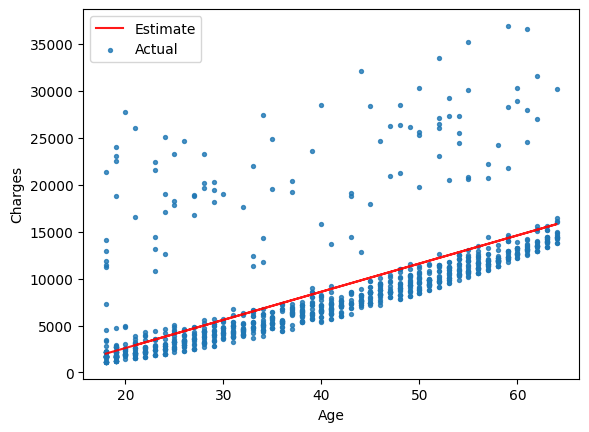

In [33]:
try_parameters(non_smoker_df, 300, -3400)

The lowest `RMSE` score is 4685.2809, achieved with `w = 300` and `b = -3400`. 

General strategy for finding the lowest value of the loss function:
- Try random values for parameters: start by assigning random values to the parameters `w` and `b`.
- Iterative optimization:
    - Fix one parameter (e.g., `w`) and vary the other parameter (`b`).
    - Estimate the loss function for the updated values. If the loss function's value increase, try decreasing `b` and estimate the loss function again.
    - If the new loss function estimation is lower, continue decreasing this parameter iteratively until the loss function no linger decreases.
- Repeat the same process for the other parameter (`w`), keeping `b` fixed.
- Repeat the step 2 and 3 iteratively.